# Ear Tracking detailed tutorial

In [1]:
%matplotlib notebook

import os
import cv2
import math as m
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

import openalea.eartrack
import openalea.eartrack.eartrack as et_lib
import openalea.eartrack.binarisation as bin
import openalea.eartrack.binarisation_folder as bin_f
from openalea.deploy.shared_data import shared_data


def img_show(imgs, titles):
    fig, axes = plt.subplots(nrows=int((len(imgs)-1)/3) + 1, ncols=min(3, len(imgs)))
    axlist = fig.get_axes()
    for i in range(len(imgs)):
        axlist[i].axis('off')
        axlist[i].set_title(titles[i])
        axlist[i].imshow(imgs[i])
        

## Get example images and parameters needed for segmentation and ear tracking

In [2]:
# Read images' information and create output folders
share_data_directory = shared_data(openalea.eartrack)
param_folder = os.path.join(share_data_directory, "parameters")
images_folder = os.path.join(share_data_directory, "images")

img_desc, parameters = bin_f.init(param_folder, images_folder, "", log=False)

## Selection of one plant and one imaging task

In [3]:
plant = img_desc.keys()[0]
task = img_desc[plant].keys()[0]

cabin = img_desc[plant][task]['cabin']

## Read images and show them

<IPython.core.display.Javascript object>


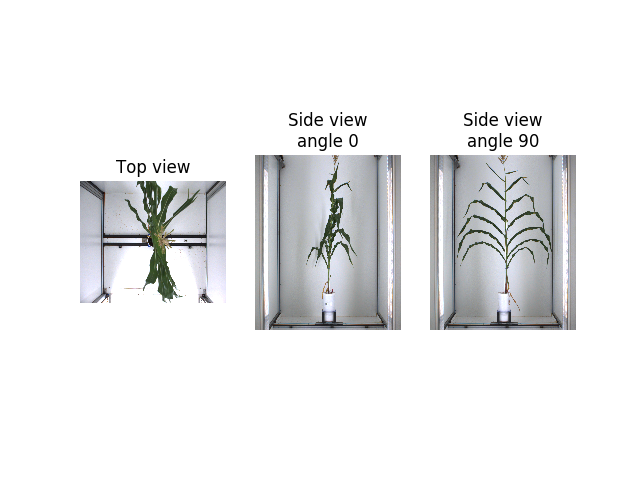

In [4]:
images = bin_f.read_images(img_desc, plant, task)

img_show([images["top"][0][:,:,::-1], images["side"][0][:,:,::-1], images["side"][90][:,:,::-1]], 
         ["Top view", "Side view\nangle 0", "Side view\nangle 90"])


## Compute binaries and show them

<IPython.core.display.Javascript object>


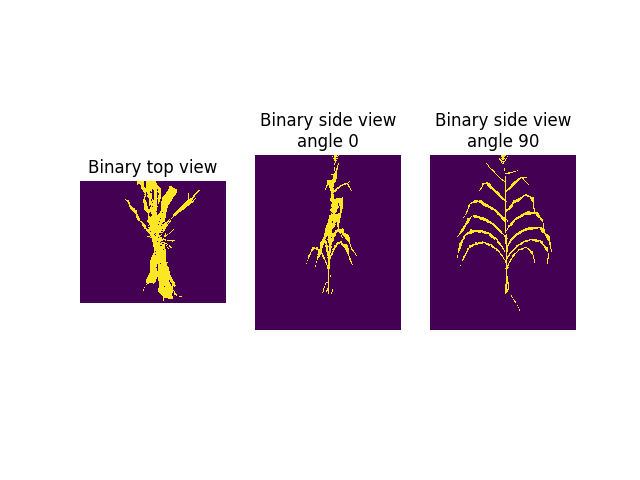

In [5]:
binaries, mask_top_center = bin_f.binaries_calculation(images, cabin, parameters)

img_show([binaries["top"][0], binaries["side"][0], binaries["side"][90]], 
         ["Binary top view", "Binary side view\nangle 0", "Binary side view\nangle 90"])

## Look for best side view images from top view image

### Compute robust major axis regression on top view image

14.0961431332


<IPython.core.display.Javascript object>


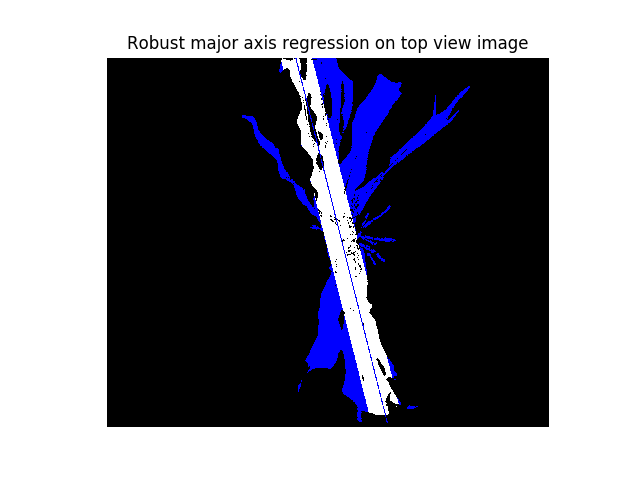

In [27]:
binary_img = binaries["top"][0].copy()
robust_img = np.zeros([binary_img.shape[0], binary_img.shape[1], 3], 'uint8')
pixels = np.where(binary_img > 0)
n = len(pixels[0])
a, b, useful_pixels, useless_pixels = et_lib.robust_majors_axes_regression_ww(pixels)
alpha = (m.atan2(a/m.sqrt(m.pow(a, 2) + 1), 1/m.sqrt(m.pow(a, 2) + 1)))*180/m.pi

print alpha
a90 = -1/a
alpha90 = ((m.atan2(a90/m.sqrt(m.pow(a90, 2) + 1), 1/m.sqrt(m.pow(a90, 2) + 1)))*180/m.pi) % 360
alpha270 = (alpha90 + 180) % 360

robust_img[useful_pixels[:, 0], useful_pixels[:, 1], :] = (255, 255, 255)
robust_img[useless_pixels[:, 0], useless_pixels[:, 1], :] = (0, 0, 255)
cv2.line(robust_img, (int(b+a*pixels[0][0]), pixels[0][0]), (int(b+a*pixels[0][n-1]), pixels[0][n-1]), (0, 0, 255), 3)
cv2.line(robust_img, (int(b+a*pixels[0][0]), pixels[0][0]+2), (int(b+a*pixels[0][n-1]), pixels[0][n-1]+1), (0, 0, 255), 3)
cv2.line(robust_img, (int(b+a*pixels[0][0]), pixels[0][0]-2), (int(b+a*pixels[0][n-1]), pixels[0][n-1]-1), (0, 0, 255), 3)
img_show([robust_img], ["Robust major axis regression on top view image"])

### Compute major axis regression on useless pixels to detect hampering leaves

(array([ 91,  91,  92, ..., 893, 893, 894]), array([1511, 1512, 1509, ..., 1361, 1362, 1361]))
[ 460.09093129  461.09093129  459.83982021  460.83982021  461.83982021
  458.58870914  459.58870914  460.58870914  461.58870914  462.58870914
  458.33759806  459.33759806  460.33759806  461.33759806  462.33759806
  463.33759806  457.08648698  458.08648698  459.08648698  460.08648698
  461.08648698  462.08648698  463.08648698  464.08648698  456.8353759
  457.8353759   458.8353759   459.8353759   460.8353759   461.8353759
  462.8353759   463.8353759   464.8353759   465.8353759   456.58426482
  457.58426482  458.58426482  459.58426482  460.58426482  461.58426482
  462.58426482  463.58426482  464.58426482  465.58426482  466.58426482
  455.33315375  456.33315375  457.33315375  458.33315375  459.33315375
  460.33315375  461.33315375  462.33315375  463.33315375  464.33315375
  465.33315375  466.33315375  467.33315375  468.33315375  455.08204267
  456.08204267  457.08204267  458.08204267  459.0820426

<IPython.core.display.Javascript object>


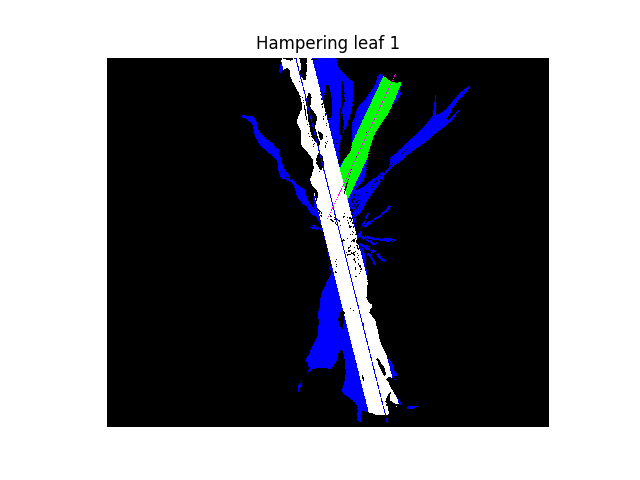

(array([156, 156, 157, ..., 681, 681, 682]), array([2009, 2010, 2008, ..., 1521, 1522, 1521]))
[ 925.28426633  926.28426633  924.03315526  925.03315526  926.03315526
  927.03315526  921.78204418  922.78204418  923.78204418  924.78204418
  925.78204418  926.78204418  927.78204418  920.5309331   921.5309331
  922.5309331   923.5309331   924.5309331   925.5309331   926.5309331
  927.5309331   928.5309331   919.27982202  920.27982202  921.27982202
  922.27982202  923.27982202  924.27982202  925.27982202  926.27982202
  927.27982202  928.27982202  918.02871095  919.02871095  920.02871095
  921.02871095  922.02871095  923.02871095  924.02871095  925.02871095
  926.02871095  927.02871095  928.02871095  915.77759987  916.77759987
  917.77759987  918.77759987  919.77759987  920.77759987  921.77759987
  922.77759987  923.77759987  924.77759987  925.77759987  926.77759987
  913.52648879  914.52648879  915.52648879  916.52648879  917.52648879
  918.52648879  919.52648879  920.52648879  921.5264887

<IPython.core.display.Javascript object>


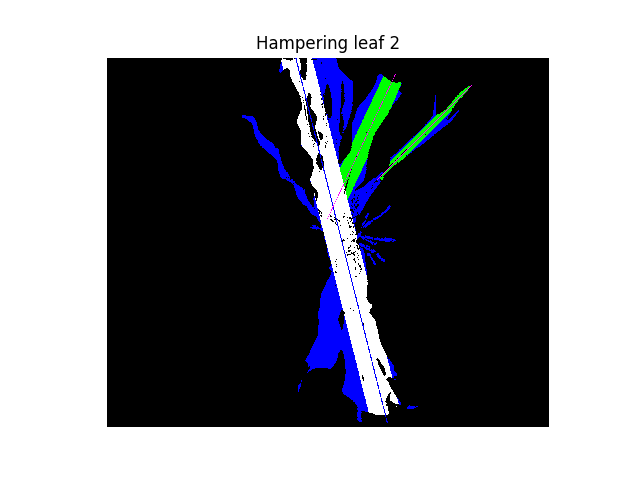

[334.77169249158254, 315.0466632412886]


In [37]:
exclusions = list()
mask = mask_top_center
unused_pixels = useless_pixels.copy()
hampering_img = robust_img.copy()
loop_again = True
found_leaves = 0
while loop_again:
    loop_again = False
    temp_img = np.zeros(binary_img.shape, 'uint8')
    temp_img[unused_pixels[:, 0], unused_pixels[:, 1]] = 255
    unused_pixels = np.empty([0, 2], 'int')
    labelled_img = measure.label(temp_img, neighbors=8)
    for region in measure.regionprops(labelled_img):
        pixels_tmp = np.where(labelled_img == region['label'])
        used_pixels = np.transpose(np.array([pixels_tmp[0], pixels_tmp[1]]))
        n_tmp = region.area
        if n_tmp > n/20:
            a_tmp, b_tmp, useful_pixels_tmp, useless_pixels_tmp = et_lib.robust_majors_axes_regression_ww(pixels_tmp)
            alpha_tmp = (m.atan2(a_tmp/m.sqrt(m.pow(a_tmp, 2) + 1), 1/m.sqrt(m.pow(a_tmp, 2) + 1)))*180/m.pi
            errors = np.array(abs(useful_pixels_tmp[:, 1] - a * useful_pixels_tmp[:, 0] - b))
            x_intersection_line = int((b - b_tmp)/(a_tmp - a))
            y_intersection_line = int(a*x_intersection_line + b)
            unused_pixels = np.append(unused_pixels, useless_pixels_tmp, axis=0)

            if 0 <= x_intersection_line < mask.shape[0] and 0 <= y_intersection_line < mask.shape[1]:
                if abs(alpha-alpha_tmp) > 20 and mask[x_intersection_line, y_intersection_line] and  errors.max() > 300:
                    max_error_pos = np.where(errors == errors.max())[0][0]
                    print pixels_tmp[:]
                    print errors[:100]
                    print max_error_pos
                    max_signed_error = useful_pixels_tmp[max_error_pos, 1] - a * useful_pixels_tmp[max_error_pos, 0] - b
                    diff = alpha - alpha_tmp
                    print errors.max()
                    if diff*max_signed_error < 0:
                        alpha_tmp = (alpha_tmp + 180) % 360
                    else:
                        alpha_tmp %= 360
                    exclusions.append(alpha_tmp)
                    print useful_pixels_tmp[max_error_pos,0]
                    hampering_img[useful_pixels_tmp[:, 0], useful_pixels_tmp[:, 1], :] = (0, 255, 0)
                    cv2.line(hampering_img, (int(b_tmp+a_tmp*pixels_tmp[0][0]), pixels_tmp[0][0]), 
                             (int(b_tmp+a_tmp*pixels_tmp[0][n_tmp-1]), pixels_tmp[0][n_tmp-1]), (255, 0, 255), 2)
                    cv2.line(hampering_img, (int(b_tmp+a_tmp*pixels_tmp[0][0]), pixels_tmp[0][0]+1),
                             (int(b_tmp+a_tmp*pixels_tmp[0][n_tmp-1]), pixels_tmp[0][n_tmp-1]+1), (255, 0, 255), 2)
                    cv2.line(hampering_img, (int(b_tmp+a_tmp*pixels_tmp[0][0]), pixels_tmp[0][0]-1),
                             (int(b_tmp+a_tmp*pixels_tmp[0][n_tmp-1]), pixels_tmp[0][n_tmp-1]-1), (255, 0, 255), 2)
                    found_leaves += 1
                    img_show([hampering_img], ["Hampering leaf " + str(found_leaves)])
                else:
                    hampering_img[used_pixels[:, 0], used_pixels[:, 1], :] = (0, 0, 255)
            else:
                hampering_img[used_pixels[:, 0], used_pixels[:, 1], :] = (0, 0, 255)
            loop_again = True
        else:
            hampering_img[used_pixels[:, 0], used_pixels[:, 1], :] = (0, 0, 255)
print exclusions

### Keep side views for ear detection from robust regression result

In [8]:
existing_angles = sorted(binaries["side"].keys())
angles_to_keep = list()
for angle in (alpha90, alpha270):
    if angle > 345:
        angle -= 360
    for i in range(len(existing_angles)):
        if abs(existing_angles[i] - angle) <= 10:
            if i > 0:
                angles_to_keep.append(existing_angles[i-1])
            else:
                angles_to_keep.append(existing_angles[len(existing_angles)-1])

            angles_to_keep.append(existing_angles[i])

            if i < len(existing_angles)-1:
                angles_to_keep.append(existing_angles[i+1])
            else:
                angles_to_keep.append(existing_angles[0])
            break
        elif abs(existing_angles[i] - angle) <= 15:
            angles_to_keep.append(existing_angles[i])
            if existing_angles[i] < angle:
                if i < len(existing_angles)-1:
                    angles_to_keep.append(existing_angles[i+1])
                else:
                    angles_to_keep.append(existing_angles[0])
            else:
                if i > 0:
                    angles_to_keep.append(existing_angles[i-1])
                else:
                    angles_to_keep.append(existing_angles[len(existing_angles)-1])
angles_to_keep.sort()
print("First step kept angles : " + ", ".join(map(str, angles_to_keep)))

First step kept angles : 90, 120, 270, 300


### Exclude side views for ear detection from hampering leaves detection

In [9]:
excluded_angles = list()
for exclude_angle in exclusions:
    exclude_negatives_angles = 1000
    if exclude_angle > 335:
        exclude_negatives_angles = exclude_angle - 360
    i = 0
    while i < len(angles_to_keep):
        if abs(exclude_angle - angles_to_keep[i]) < 25:
            excluded_angles.append(angles_to_keep.pop(i))
        elif abs(exclude_negatives_angles - angles_to_keep[i]) < 25:
            excluded_angles.append(angles_to_keep.pop(i))
        else:
            i += 1
print("Second step excluded angles : " + ", ".join(map(str, excluded_angles)))
print("Finals kept angles : " + ", ".join(map(str, angles_to_keep)))

Second step excluded angles : 300
Finals kept angles : 90, 120, 270


## Look for ear position in best side view images

In [10]:
kept_positions = np.empty([0, 3], 'int')
useful_kept_images = np.empty([0], 'int')
angle = angles_to_keep[0]
binary_img = binaries["side"][angle]
color_img = images["side"][angle]
pot_height = parameters[cabin]["side"]["pot_height"]
pot_center = parameters[cabin]["side"]["pot_width"]

binary_img = bin.close(binary_img, iterations=4)

# Get the biggest region
biggest_binary_region = et_lib.binary_biggest_region(binary_img)

# Extract skeleton of plant
output_skeleton_img = et_lib.get_skeleton(biggest_binary_region)

# Extract distance transform
dist_trans_img = et_lib.distance_transform(biggest_binary_region)

# skimage's graph library and skeleton cleaning
begin, end = et_lib.get_endpoints(output_skeleton_img, pot_center, pot_height)
if begin == [-1, -1]:
    raise ValueError( "Error in bottom's stem detection")
output_skeleton_img = et_lib.skeleton_cleaning(output_skeleton_img, begin)
route = et_lib.find_cross_route(output_skeleton_img, begin)
route.reverse()

# Make color image with distance transform 
output_dt_img = dist_trans_img*255/dist_trans_img.max()
output_dt_img = output_dt_img.astype(int)

# Make image binary and skeletons
output_binary_img = np.zeros(color_img.shape, 'uint8')
output_binary_img[:, :, 0] = biggest_binary_region
output_binary_img[:, :, 1] = biggest_binary_region
output_binary_img[:, :, 2] = biggest_binary_region
for pix in route:
    output_binary_img[pix[0], pix[1]-2:pix[1]+2, :] = (0, 0, 255)

# Get main direction of stem, rotate the stem and adapt on it the
# following derivation algorithme
init_stem = np.zeros(biggest_binary_region.shape, 'uint8')
for pix in route:
    mask = dist_trans_img[pix[0], pix[1]]
    init_stem[pix[0]-mask:pix[0]+mask+1, pix[1]-mask:pix[1]+mask+1] = 255
output_stem_img, a, b, r_xy, alpha = et_lib.majors_axes_regression_line(init_stem)

# Perform derivation on route to
diff, x, y = et_lib.derivate(route)

# Eliminate noise on derivation curve
indices = et_lib.differential_cleaning(diff, x, y, 10, 5, 5)

# Delete extrema error
i = len(indices)-1
while indices[i][2] == 0:
    i -= 1
if x[len(y)-1] == x[indices[i][0]] or \
        abs(float(y[len(y)-1] - y[indices[i][0]])/float(x[len(y)-1] -
                                                x[indices[i][0]]) - a) > 1:
    for j in range(len(indices)-1, i-1, -1):
        route = route[:indices[i][0]]
        indices.pop(len(indices)-1)
i = 0
while indices[i][2] == 0:
    i += 1
if x[indices[i][1]] == x[0] or \
        abs(float(y[indices[i][1]] - y[0])/float(x[indices[i][1]] -
                                                x[0]) - a) > 1:
    for j in range(i+1):
        route = route[indices[0][1]:]
        indices.pop(0)

# Stem reconstruction
cleaned_stem = np.zeros(biggest_binary_region.shape, 'uint8')
for pix in route:
    mask = dist_trans_img[pix[0], pix[1]]
    cleaned_stem[pix[0]-mask:pix[0]+mask+1, pix[1]-mask:pix[1]+mask+1] = \
        biggest_binary_region[pix[0]-mask:pix[0]+mask+1,
        pix[1]-mask:pix[1]+mask+1]

output_stem_img, a, b, r_xy, alpha = et_lib.majors_axes_regression_line(cleaned_stem)

if r_xy > 30:
    img_debug[name + "_stem_error" + ext] = output_stem_img
    raise ValueError("Stem detection error")

skeleton_stem = np.zeros(binary_img.shape, 'uint8')
for pixel in route:
    skeleton_stem[pixel] = 1
begin, end = et_lib.get_endpoints(skeleton_stem, pot_center, pot_height)
if begin == [-1, -1] or end == [-1, -1]:
    raise ValueError("Error in bottom or top of stem detection after cleaning stem")
route = et_lib.find_route(skeleton_stem, begin, end)

# Statistics on distances curve to detect probable ear position
distances = et_lib.get_distances(route, dist_trans_img)
distances_length = float(len(distances))

part_1 = int(round(len(distances)/2.5))

position = 0

solutions, stems, pics, poses = et_lib.ear_detection(distances)
minus_pos = poses[0]
stem_pos_after_ear = poses[1]

kept_solutions = -1
for i in range(len(solutions)):
    if solutions[i][1] > 0:
        kept_positions = np.append(kept_positions, [[route[solutions[i][0]][0],
                                                    route[solutions[i][0]][1],
                                                    solutions[i][1]]], axis=0)
        useful_kept_images = np.append(useful_kept_images, angle)
        if kept_solutions < 0:
            kept_solutions = i
            position = solutions[i][0]
        elif solutions[i][1] > solutions[kept_solutions][1]:
            kept_solutions = i
            position = solutions[i][0]

print("Stem width bellow the ear = " + str(distances[minus_pos]))
if kept_solutions >= 0:
    print("Stem with up to the ear = " + str(distances[stem_pos_after_ear]) + "\n")

    print("Probable ear position : " + str(route[position][0]) + "\n")

else:
    print("Ear detection error\n")

print("Solutions : \n")
for sol in solutions:
    print("\tsolution : " + str(route[sol[0]][0]) + ", weight : " + str(sol[1]))
print("Peaks (leaves) :")
for pic in pics:
    print("\tpeak : " + str(route[pic[0]][0]) + ", begin : " + str(route[pic[1]][0]) + ", end : " + 
          str(route[pic[2]][0]) + ", relative length : " + str(float(pic[2] - pic[1])*100./distances_length))
print("Troughs (stem part) :")
for stem in stems:
    print("\tbegin : " + str(route[stem[0]][0]) + ", end : " + str(route[stem[1]][0]) + ", relative length : " + 
          str(float(stem[1] - stem[0])*100./distances_length))

# yellow square on solution
output_results_img = color_img.copy()
output_results_img[route[position][0]-5:route[position][0]+5,
              route[position][1]-5:route[position][1]+5, :] = (0, 255, 255)

for i in range(len(route)):
    output_binary_img[route[i][0], route[i][1]-2:route[i][1]+2, :] = (0, 255, 0)
    if i < stem_pos_after_ear:
        mask = distances[minus_pos]
    else:
        mask = distances[stem_pos_after_ear]
    if distances[i] == distances[minus_pos] and i < part_1:
        output_results_img[route[i][0], route[i][1]-mask:route[i][1]+mask+1, 0] = 255
    elif distances[i] == distances[stem_pos_after_ear] and i >= part_1 and position:
        output_results_img[route[i][0], route[i][1]-mask:route[i][1]+mask+1, 1] = 255
    else:
        output_results_img[route[i][0], route[i][1]-mask:route[i][1]+mask+1, 2] = 255
output_binary_img[route[position][0]-5:route[position][0]+5, route[position][1]-5:route[position][1]+5, :] = (0, 0, 255)
output_binary_img[route[minus_pos][0]-5:route[minus_pos][0]+5, route[minus_pos][1]-5:route[minus_pos][1]+5, :] = (255, 0, 0)

Stem width bellow the ear = 14
Stem with up to the ear = 7

Probable ear position : 876

Solutions : 

	solution : 876, weight : 2
	solution : 777, weight : 0
	solution : 632, weight : 0
	solution : 502, weight : 0
	solution : 373, weight : 0
Peaks (leaves) :
	peak : 1138, begin : 1239, end : 1111, relative length : 6.77966101695
	peak : 1057, begin : 1082, end : 1040, relative length : 2.22457627119
	peak : 876, begin : 948, end : 873, relative length : 4.02542372881
	peak : 777, begin : 799, end : 761, relative length : 2.01271186441
	peak : 632, begin : 654, end : 627, relative length : 1.43008474576
	peak : 502, begin : 520, end : 493, relative length : 1.43008474576
	peak : 373, begin : 380, end : 369, relative length : 0.582627118644
	peak : 130, begin : 130, end : 129, relative length : 0.0529661016949
	peak : 38, begin : 82, end : 38, relative length : 2.33050847458
Troughs (stem part) :
	begin : 870, end : 807, relative length : 3.33686440678
	begin : 758, end : 662, relative 

<IPython.core.display.Javascript object>


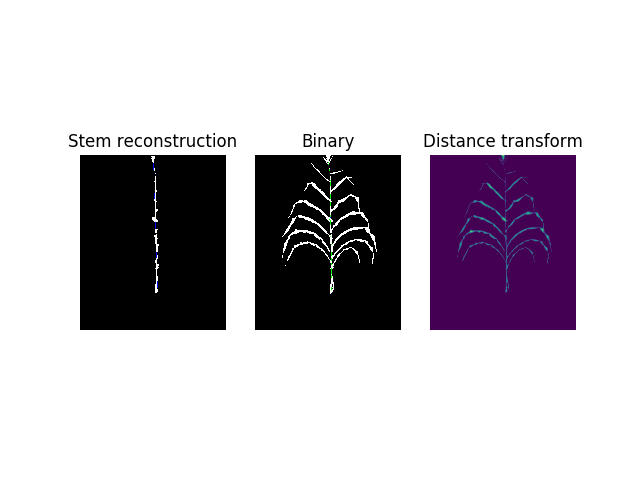

<IPython.core.display.Javascript object>


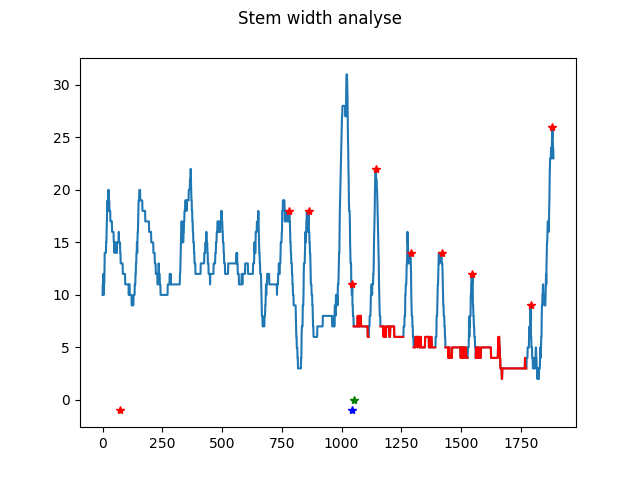

<IPython.core.display.Javascript object>


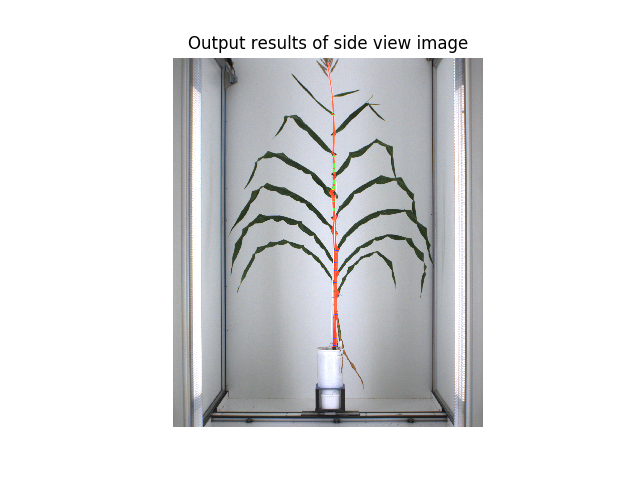

In [11]:
# show images
img_show([output_stem_img, output_binary_img, output_dt_img],
         ["Stem reconstruction", "Binary", "Distance transform"])

fig = plt.figure()
plt.plot(distances)
plt.plot(minus_pos, -1,'r*')
plt.plot(stem_pos_after_ear, 0,'g*')
plt.plot(position, -1,'b*')
for i in pics[:,0]:
    plt.plot(i,distances[i], 'r*')
for stem in stems:
    plt.plot(range(stem[0],stem[1]),distances[stem[0]:stem[1]],'r')
fig.suptitle("Stem width analyse")
plt.show()

img_show([output_results_img[:,:,::-1]], ["Output results of side view image"])


In [12]:
angles_to_keep.pop(0)
for angle in angles_to_keep:
    positions, imagesUtiles, side_log, img_debug = et_lib.side_analyse(binaries["side"][angle],
                                                                       images["side"][angle],
                                                                       angle,
                                                                       parameters[cabin]["side"]["pot_height"],
                                                                       parameters[cabin]["side"]["pot_width"])
    kept_positions = np.append(kept_positions, positions, axis=0)
    useful_kept_images = np.append(useful_kept_images, imagesUtiles, axis=0)

## Perform a vote between results provide by the previous step

In [15]:
values = np.empty([0, 2], 'int')
im = np.empty([0], 'int')
for i in range(len(kept_positions)):
    for j in range(kept_positions[i, 2]):
        values = np.append(values, [kept_positions[i, 0:2]], axis=0)
        im = np.append(im, useful_kept_images[i])
print values
mean_pos, finales_positions, final_kept_images = et_lib.robust_mean(values, im)
finales_positions = np.append(finales_positions, np.array([final_kept_images]).T, 1)
print mean_pos
print finales_positions

[[ 876 1057]
 [ 876 1057]
 [1140 1043]
 [1140 1043]
 [1139 1007]
 [1139 1007]]
[ 1139.5  1025. ]
[[1139 1007  270]
 [1140 1043  120]]


## Display finale(s) ear position(s)

<IPython.core.display.Javascript object>


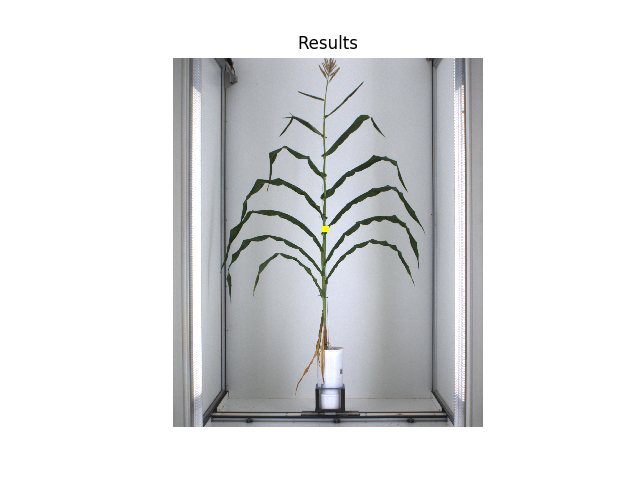

In [14]:
finale_img = images["side"][finales_positions[0, 2]].copy()
if not (mean_pos == [-1, -1]).all():
    pos = finales_positions[0, 0:2]
    finale_img[pos[0] - 20:pos[0] + 21, pos[1] - 20:pos[1] + 21, :] = [0, 255, 255]
elif finales_positions.shape[0] == 2:
    for pos in finales_positions:
        finale_img[pos[0] - 20:pos[0] + 21, pos[1] - 20:pos[1] + 21, :] = [0, 255, 255]
img_show([finale_img[:,:,::-1]], ["Results"])